# Лабораторная работа: Аппроксимация и линеаризация функций


## Вспомогательные функции:
Реализовать функцию, вычисляющую среднеквадратичное отклонение (СКО) набора числовых данных


# 1: Линейная аппроксимация (МНК)

## Описание
Изучается процесс нагрева воды в электрическом чайнике. Измеряется температура воды 
T в градусах Цельсия в зависимости от времени нагрева 
t в минутах. Из-за постоянного поступления тепла температура воды растёт почти линейно на начальном этапе.

### Задача
Найти линейную зависимость температуры воды от времени нагрева в виде уравнения:
\[
T = a t + b,
\]
### Требуется
- Определить коэффициенты \(a\) и \(b\),
- Построить график зависимости температуры от времени, отображая экспериментальные точки и линию аппроксимации,
- Рассчитать среднеквадратичное отклонение (СКО) между экспериментальными и расчетными значениями температуры, чтобы проверить точность модели.


## Исходные данные

Коэффициенты линейной модели:
a (наклон) = 2.4336
b (свободный член) = 19.9045

Среднеквадратичное отклонение (СКО): 0.0583


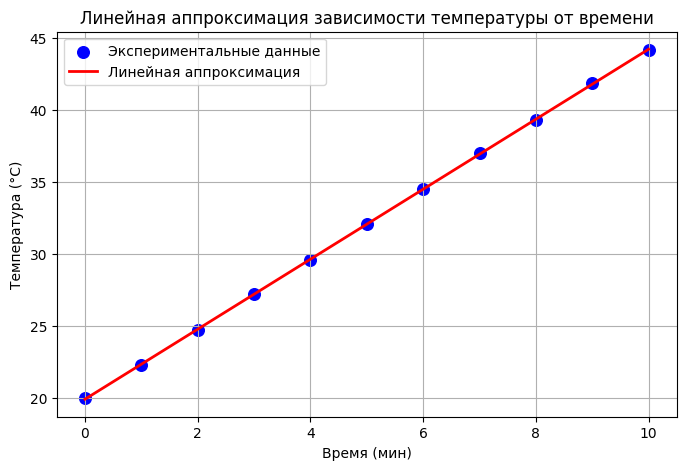

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Исходные данные
# -----------------------------
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # время (мин)
T = np.array([20.0, 22.3, 24.7, 27.2, 29.6, 32.1, 34.5, 37.0, 39.3, 41.9, 44.2])  # температура (°C)

# -----------------------------
# 2. Линейная аппроксимация (МНК)
# -----------------------------
a, b = np.polyfit(t, T, 1)  # вычисляем коэффициенты прямой

print("Коэффициенты линейной модели:")
print(f"a (наклон) = {a:.4f}")
print(f"b (свободный член) = {b:.4f}")

# -----------------------------
# 3. Вычисляем предсказанные значения
# -----------------------------
T_pred = a * t + b

# -----------------------------
# 4. Вычисляем среднеквадратичное отклонение (СКО)
# -----------------------------
sigma = np.sqrt(np.mean((T - T_pred)**2))
print(f"\nСреднеквадратичное отклонение (СКО): {sigma:.4f}")

# -----------------------------
# 5. Построение графика
# -----------------------------
plt.figure(figsize=(8, 5))

# экспериментальные данные
plt.scatter(t, T, color='blue', label="Экспериментальные данные", s=70)

# линия аппроксимации
plt.plot(t, T_pred, color='red', label="Линейная аппроксимация", linewidth=2)

plt.title("Линейная аппроксимация зависимости температуры от времени")
plt.xlabel("Время (мин)")
plt.ylabel("Температура (°C)")
plt.grid(True)
plt.legend()
plt.show()


# 2: Линеаризация экспоненциальной функции

## Описание
Изучается процесс разрядки аккумулятора мобильного устройства. Известно, что напряжение аккумулятора \( V(t) \) со временем уменьшается по экспоненциальному закону:
$V(t) = a \cdot e^{bt}$

Требуется:
- Линеаризовать экспоненциальную функцию,
- Найти параметры \( a \) и \( b \),
- Построить график зависимости напряжения от времени (экспериментальные данные и аппроксимация),
- Спрогнозировать дальнейшее падение напряжения,
- Рассчитать среднеквадратичное отклонение (СКО).

## Исходные данные

ЛИНЕЙНАЯ МОДЕЛЬ:
c = 1.432302   (это ln(a))
d = -0.014886   (это b)

ПАРАМЕТРЫ ЭКСПОНЕНЦИАЛЬНОЙ МОДЕЛИ:
a = 4.188328
b = -0.014886

СКО = 0.027380

ПРОГНОЗ НАПРЯЖЕНИЯ:
1 ч → 4.126 В
2 ч → 4.065 В
3 ч → 4.005 В
4 ч → 3.946 В
5 ч → 3.888 В
6 ч → 3.830 В
7 ч → 3.774 В
8 ч → 3.718 В
9 ч → 3.663 В
10 ч → 3.609 В
11 ч → 3.556 В
12 ч → 3.503 В
13 ч → 3.451 В
14 ч → 3.400 В
15 ч → 3.350 В
16 ч → 3.301 В
17 ч → 3.252 В
18 ч → 3.204 В
19 ч → 3.156 В
20 ч → 3.110 В
21 ч → 3.064 В
22 ч → 3.019 В
23 ч → 2.974 В
24 ч → 2.930 В


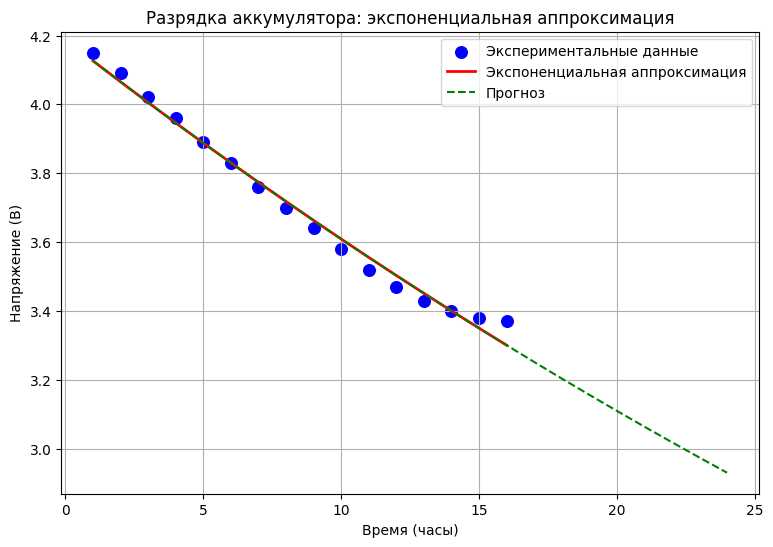

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Исходные данные
# -----------------------------
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])

# -----------------------------
# 2. Линеаризация
#    T = a * e^(b t)
#    ln(T) = ln(a) + b t
# -----------------------------
g = np.log(voltage)   # g = ln(T)
t = hours.copy()      # t остаётся t

# линейная модель: g = c + d * t
d, c = np.polyfit(t, g, 1)

print("ЛИНЕЙНАЯ МОДЕЛЬ:")
print(f"c = {c:.6f}   (это ln(a))")
print(f"d = {d:.6f}   (это b)")

# -----------------------------
# 3. Возвращаем параметры экспоненты
# -----------------------------
a = np.exp(c)
b = d

print("\nПАРАМЕТРЫ ЭКСПОНЕНЦИАЛЬНОЙ МОДЕЛИ:")
print(f"a = {a:.6f}")
print(f"b = {b:.6f}")

# -----------------------------
# 4. Строим экспоненциальную аппроксимацию
# -----------------------------
voltage_pred = a * np.exp(b * hours)

# -----------------------------
# 5. СКО (качество модели)
# -----------------------------
sigma = np.sqrt(np.mean((voltage - voltage_pred)**2))
print(f"\nСКО = {sigma:.6f}")

# -----------------------------
# 6. Прогноз значений
# -----------------------------
future_hours = np.arange(1, 25)   # на 24 часа
future_pred = a * np.exp(b * future_hours)

print("\nПРОГНОЗ НАПРЯЖЕНИЯ:")
for h, v in zip(future_hours, future_pred):
    print(f"{h} ч → {v:.3f} В")

# -----------------------------
# 7. График
# -----------------------------
plt.figure(figsize=(9, 6))

plt.scatter(hours, voltage, s=70, color="blue", label="Экспериментальные данные")
plt.plot(hours, voltage_pred, color="red", linewidth=2, label="Экспоненциальная аппроксимация")
plt.plot(future_hours, future_pred, linestyle="--", color="green", label="Прогноз")

plt.xlabel("Время (часы)")
plt.ylabel("Напряжение (В)")
plt.title("Разрядка аккумулятора: экспоненциальная аппроксимация")
plt.grid(True)
plt.legend()
plt.show()




## Процесс линеаризации

**Шаг 1:** Исходная функция: $T(t) = a \cdot e^{bt}$

**Шаг 2:** Логарифмируем обе части:
$\ln(T) = \ln(a) + bt$

**Шаг 3:** Делаем замены: $g = \ln(T)$, $t = t$, $c = \ln(a)$, $d = b$

**Шаг 4:** Получаем линейную функцию: $g = c + d \cdot t$

# Вариант задание выбирается Номер в списке % 3

# Задание 3 Вариант 0

## Описание задачи
При исследовании зависимости силы трения от нормальной нагрузки получены следующие экспериментальные данные:

| Нормальная сила (Н) | 1 | 2 | 3 | 5 | 8 | 10 | 15 | 20 |
|---|---|---|---|---|---|---|---|---|
| Сила трения (Н) | 0.30 | 0.88 | 1.65 | 4.08 | 10.21 | 15.95 | 35.70 | 63.50 |

## Задание
1. Предположите **степенную функцию** вида $f = c \cdot N^\alpha$.
2. Выполните **логарифмическую линеаризацию**: прологарифмируйте обе части уравнения и получите $\ln f = \ln c + \alpha \ln N$.
3. Постройте **линейную регрессию** для преобразованных координат $(\ln N, \ln f)$.
4. Найдите параметры $c$ и $\alpha$, вычислите $R^2$.
5. Постройте **графики** в логарифмических координатах (линия регрессии) и в исходных координатах (степенная функция через исходные данные).
6. Используя полученную модель, предскажите силу трения при нормальной силе 25 Н.

---

# Задание 3 Вариант 1

## Описание задачи
Биологи проводили сравнительное исследование интенсивности основного обмена (BMR, Basal Metabolic Rate) у различных млекопитающих в зависимости от их массы тела. Согласно эмпирическому закону Клейбера, метаболизм животного подчиняется степенной зависимости. Полученные экспериментальные данные:

| Вид животного | Масса (кг) | Основной обмен (ккал/день) |
|---|---|---|
| Мышь | 0.03 | 1.2 |
| Крыса | 0.2 | 5.8 |
| Кролик | 2.0 | 45.0 |
| Кошка | 4.5 | 110.0 |
| Собака | 15 | 380.0 |
| Обезьяна | 35 | 920.0 |
| Человек | 70 | 1850.0 |
| Лошадь | 450 | 10500.0 |
| Слон | 5000 | 95000.0 |

## Задание

1. Предположите **степенную зависимость** вида $BMR = c \cdot M^\alpha$, где $M$ — масса животного, $BMR$ — основной обмен, $c$ и $\alpha$ — параметры модели.

2. Выполните **логарифмическую линеаризацию**: преобразуйте исходные координаты, взяв логарифмы обеих частей:
   $\ln(BMR) = \ln(c) + \alpha \ln(M)$

3. Постройте **линейную регрессию** для преобразованных координат $(\ln M, \ln BMR)$:
   - Найдите параметры линии регрессии
   - Вычислите $R^2$ для линеаризованной модели
   - Оцените погрешность определения параметров

4. Восстановите исходные параметры степенной функции:
   - Найдите $c = e^b$, где $b$ — свободный член линейной регрессии
   - Получите показатель степени $\alpha$

5. Создайте **комплексную визуализацию**:
   - График в логарифмических координатах $(\ln M, \ln BMR)$ с линией регрессии
   - График в исходных координатах с степенной кривой
   - График остатков в обоих представлениях

6. Вычислите **коэффициент детерминации** $R^2$ для исходной степенной модели и сравните с линеаризованной.

7. Проанализируйте результаты:
   - Согласуется ли найденное значение $\alpha$ с известным результатом Клейбера (теоретически $\alpha \approx 0.75$)?
   - Что означает показатель степени $\alpha$ с физиологической точки зрения?
   - Как соотносятся поверхность и объём тела животного с показателем 0.75?

8. Используя полученную модель, предскажите основной обмен для:
   - Льва массой 190 кг
   - Енота массой 8 кг
   - Синего кита массой 150 000 кг

---

# Задание 3 Вариант 2

## Описание задачи
При исследовании освещённости поверхности в зависимости от расстояния до точечного источника света проведены измерения интенсивности света. Теоретически свет распространяется по закону обратных квадратов, но из-за рассеяния и поглощения в атмосфере показатель степени может отличаться от -2. Экспериментальные данные:

| Расстояние (м) | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 | 4.0 | 5.0 | 6.0 | 7.0 |
|---|---|---|---|---|---|---|---|---|---|---|
| Интенсивность (люкс) | 2000 | 520 | 235 | 135 | 87 | 62 | 35 | 23 | 16 | 12 |

## Задание

1. Предположите **степенную функцию** вида $I = c \cdot r^\alpha$, где $r$ — расстояние до источника, $I$ — интенсивность света, $c$ и $\alpha$ — параметры.

2. Выполните **двойную логарифмическую линеаризацию**:
   $\ln(I) = \ln(c) + \alpha \ln(r)$

3. Постройте **линейную регрессию** для координат $(\ln r, \ln I)$:
   - Найдите коэффициенты регрессии
   - Вычислите коэффициент корреляции и $R^2$
   - Определите доверительный интервал для параметра $\alpha$

4. Восстановите параметры степенной функции $c$ и $\alpha$.

5. Выполните **анализ отклонений от теории**:
   - Сравните полученное значение $\alpha$ с теоретическим $\alpha = -2$
   - Объясните причины отклонения (рассеяние, поглощение, асферичность источника)

6. Создайте **графики**:
   - Двойной логарифмический график с линией регрессии
   - Исходные данные в линейном масштабе со степенной кривой
   - График остатков с выявлением систематических погрешностей

7. Вычислите **относительную ошибку** для каждой точки в процентах:
   $\delta_i = \frac{|I_{измеренная} - I_{предсказанная}|}{I_{измеренная}} \times 100\%$

8. Определите, в каком диапазоне расстояний модель работает наиболее точно, и объясните причины изменения точности.

9. Используя полученную модель, предскажите интенсивность света на расстояниях:
   - 0.3 м (экстраполяция в близкую область)
   - 10 м (экстраполяция в дальнюю область)
   - Оцените надежность предсказаний


ПАРАМЕТРЫ МОДЕЛИ:
c = 28.763022
α = 0.955183

R² (в логарифмическом виде) = 0.998909
R² (в исходных координатах) = 0.998646


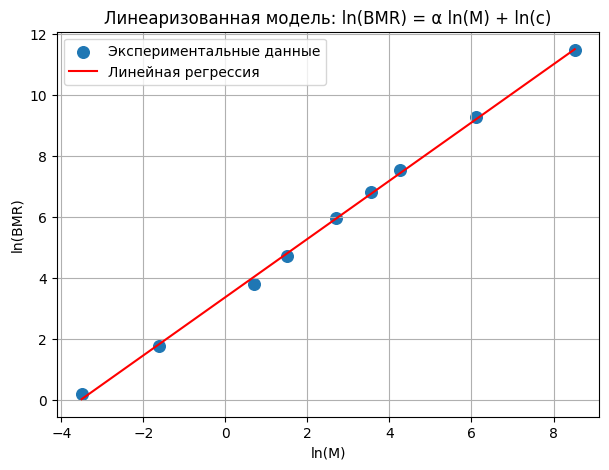

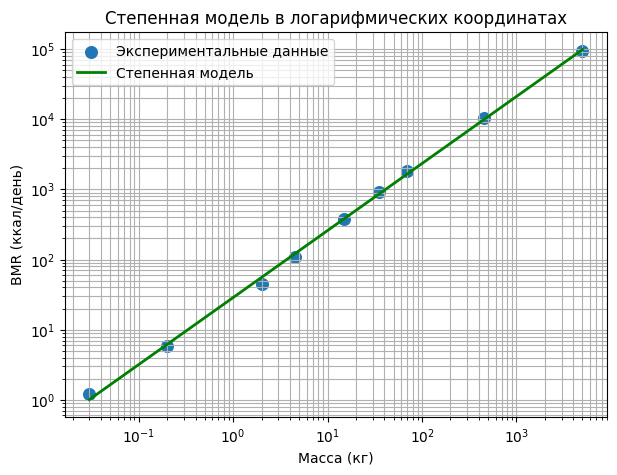

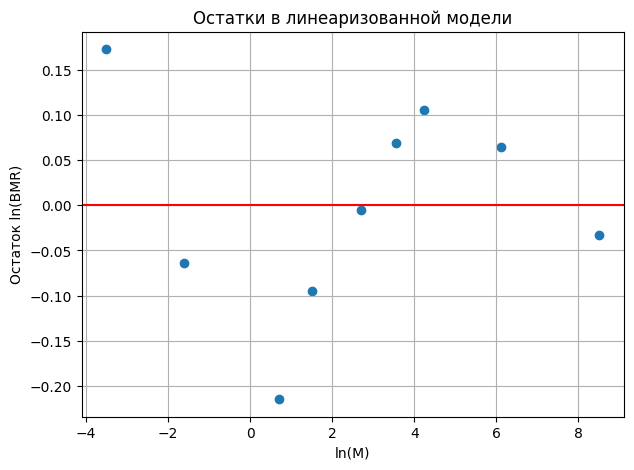

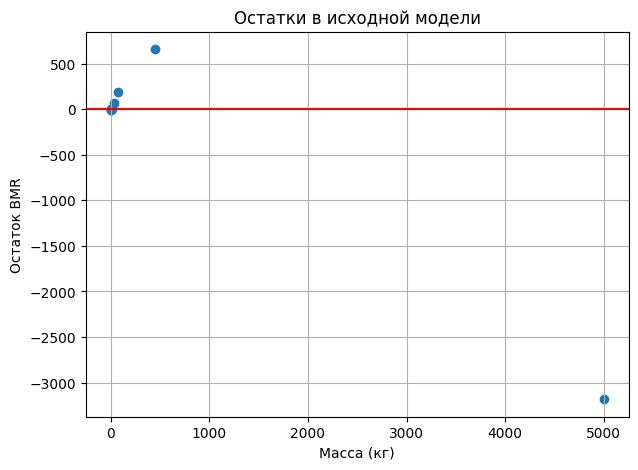


ПРОГНОЗЫ:
Лев (190 кг): 4319.78 ккал/день
Енот (8 кг): 209.63 ккал/день
Синий кит (150000 кг): 2529009.21 ккал/день


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------
# 1. Исходные данные
# ---------------------------------------
animals = np.array([
    "Мышь", "Крыса", "Кролик", "Кошка",
    "Собака", "Обезьяна", "Человек",
    "Лошадь", "Слон"
])

M = np.array([0.03, 0.2, 2.0, 4.5, 15, 35, 70, 450, 5000])      # масса
BMR = np.array([1.2, 5.8, 45, 110, 380, 920, 1850, 10500, 95000])  # основной обмен

# ---------------------------------------
# 2. Линеаризация
#    BMR = c * M^α
#    ln(BMR) = ln(c) + α ln(M)
# ---------------------------------------
lnM = np.log(M)
lnBMR = np.log(BMR)

# ---------------------------------------
# 3. Линейная регрессия
# ---------------------------------------
alpha, ln_c = np.polyfit(lnM, lnBMR, 1)

c = np.exp(ln_c)

print("ПАРАМЕТРЫ МОДЕЛИ:")
print(f"c = {c:.6f}")
print(f"α = {alpha:.6f}")

# предсказанные значения
lnBMR_pred = alpha * lnM + ln_c
BMR_pred = c * M**alpha

# ---------------------------------------
# 4. Коэффициент детерминации R^2
# ---------------------------------------
SS_res = np.sum((lnBMR - lnBMR_pred)**2)
SS_tot = np.sum((lnBMR - np.mean(lnBMR))**2)
R2_linear = 1 - SS_res / SS_tot

print(f"\nR² (в логарифмическом виде) = {R2_linear:.6f}")

# R² для степенной модели в исходных координатах
SS_res_orig = np.sum((BMR - BMR_pred)**2)
SS_tot_orig = np.sum((BMR - np.mean(BMR))**2)
R2_original = 1 - SS_res_orig / SS_tot_orig

print(f"R² (в исходных координатах) = {R2_original:.6f}")

# ---------------------------------------
# 5. Визуализация
# ---------------------------------------

# --- График в логарифмических координатах ---
plt.figure(figsize=(7, 5))
plt.scatter(lnM, lnBMR, s=70, label="Экспериментальные данные")
plt.plot(lnM, lnBMR_pred, color="red", label="Линейная регрессия")
plt.xlabel("ln(M)")
plt.ylabel("ln(BMR)")
plt.title("Линеаризованная модель: ln(BMR) = α ln(M) + ln(c)")
plt.grid(True)
plt.legend()
plt.show()

# --- График степенной функции в обычных координатах ---
M_plot = np.linspace(min(M), max(M), 500)
BMR_plot = c * M_plot**alpha

plt.figure(figsize=(7, 5))
plt.scatter(M, BMR, s=70, label="Экспериментальные данные")
plt.plot(M_plot, BMR_plot, color="green", linewidth=2, label="Степенная модель")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Масса (кг)")
plt.ylabel("BMR (ккал/день)")
plt.title("Степенная модель в логарифмических координатах")
plt.grid(True, which="both")
plt.legend()
plt.show()

# --- График остатков ---
residuals_ln = lnBMR - lnBMR_pred
residuals_orig = BMR - BMR_pred

plt.figure(figsize=(7, 5))
plt.scatter(lnM, residuals_ln)
plt.axhline(0, color='red')
plt.xlabel("ln(M)")
plt.ylabel("Остаток ln(BMR)")
plt.title("Остатки в линеаризованной модели")
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(M, residuals_orig)
plt.axhline(0, color='red')
plt.xlabel("Масса (кг)")
plt.ylabel("Остаток BMR")
plt.title("Остатки в исходной модели")
plt.grid(True)
plt.show()

# ---------------------------------------
# 6. Прогноз значений
# ---------------------------------------
def predict_bmr(mass):
    return c * mass**alpha

lion_190 = predict_bmr(190)
raccoon_8 = predict_bmr(8)
whale_150000 = predict_bmr(150000)

print("\nПРОГНОЗЫ:")
print(f"Лев (190 кг): {lion_190:.2f} ккал/день")
print(f"Енот (8 кг): {raccoon_8:.2f} ккал/день")
print(f"Синий кит (150000 кг): {whale_150000:.2f} ккал/день")